<p align="center">
    <h1 align="center">Playing with Pandas</h1>
   <img src="pandas.jpg" width="600px" >
</p>

### Installation

#### If you conda install on your machine, then you will already have `pandas` **

Or you can just do

`pip install pandas`


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as p
%matplotlib inline

### We will be covering .....
 
<br> ** 1 . Creating a dataframe ** </br>
<br> ** 2 . Reading a dataframe from multiple sources ** </br>
<br> ** 3 . Slice and dice ** </br>
<br> ** 4. Accessing rows and columns in dataframe ** </br>
<br> ** 5. unique values for a column ** </br>
<br> ** 6. Filtering rows in a dataframe ** </br>
<br> ** 7. Drop column, drop duplicates ** </br>
<br> ** 8. Describe ** </br>
<br> ** 9. Creating a new columns based on existing columns ** </br>
<br> ** 10. Group by and Aggregate ** </br>
<br> ** 11. Merge and concatenate ** </br>
<br> ** 11. Pipe ** </br>
<br> ** 12. Reshape and transform ** </br>
<br> ** 13. Pivot ** </br>
<br> ** 14. Pivot table ** </br>
<br> ** 15. Visualisation ** </br>


In [178]:
sample_df = pd.DataFrame({'A': [1,2,3],
                        'B' : ['Hari','John','Arsh']})

In [179]:
sample_df

,A,B
0,1,Hari
1,2,John
2,3,Arsh


In [180]:
constituents_df = pd.read_csv('SNP_500_companies/constituents_csv.csv')

In [183]:
constituents_df.shape

(505, 3)

In [185]:
constituents_df.head(15)

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
5,ATVI,Activision Blizzard,Information Technology
6,AYI,Acuity Brands Inc,Industrials
7,ADBE,Adobe Systems Inc,Information Technology
8,AAP,Advance Auto Parts,Consumer Discretionary
9,AMD,Advanced Micro Devices Inc,Information Technology


In [188]:
constituents_df.tail(10)

,Symbol,Name,Sector
495,WYNN,Wynn Resorts Ltd,Consumer Discretionary
496,XEL,Xcel Energy Inc,Utilities
497,XRX,Xerox Corp.,Information Technology
498,XLNX,Xilinx Inc,Information Technology
499,XL,XL Capital,Financials
500,XYL,Xylem Inc.,Industrials
501,YUM,Yum! Brands Inc,Consumer Discretionary
502,ZBH,Zimmer Biomet Holdings,Health Care
503,ZION,Zions Bancorp,Financials
504,ZTS,Zoetis,Health Care


In [191]:
constituents_df['Sector'].iloc[5]

'Information Technology'

In [192]:
constituents_df.iloc[5]['Sector']

'Information Technology'

In [196]:
constituents_df.Sector.nunique()

11

In [197]:
constituents_df.Sector.value_counts()

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [198]:
df = constituents_df[constituents_df.Sector=='Financials']

In [199]:
df.shape

(68, 3)

In [201]:
df = constituents_df[(constituents_df.Sector=='Financials') & (constituents_df.Symbol.str.startswith('J'))]

In [202]:
df

,Symbol,Name,Sector
263,JPM,JPMorgan Chase & Co.,Financials


In [209]:
df = df.drop('Symbol',axis=1,inplace=True)

/Users/jinendra/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [210]:
df

In [211]:
constituents_financials_df = pd.read_csv('SNP_500_companies/constituents-financials_csv.csv')


In [212]:
constituents_financials_df.head()

,Symbol,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [215]:
constituents_financials_df[constituents_financials_df.Sector=='Financials'].describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01,6.800000e+01,68.000000,68.000000
mean,89.056029,17.198971,2.017241,4.436912,101.821849,72.694468,5.062720e+10,5.290676e+08,3.358182,6.735294
std,73.949182,7.543603,1.005999,6.220937,84.754970,56.469743,7.358848e+10,1.110070e+09,2.606593,26.616892
min,13.380000,-19.930000,0.000000,-24.620000,16.530000,11.481000,3.692691e+09,0.000000e+00,0.698658,0.510000
25%,48.327500,13.327500,1.533955,2.240000,55.997500,38.112500,1.351970e+10,0.000000e+00,1.590099,1.227500
50%,71.105000,16.300000,1.930323,3.485000,81.315000,58.395050,2.662220e+10,0.000000e+00,2.876552,1.600000
75%,104.505000,20.362500,2.356969,5.632500,121.837500,83.855000,4.789779e+10,1.221015e+08,3.577746,2.457500
max,509.380000,35.060000,5.429864,30.300000,594.520000,368.000000,3.866140e+11,5.684000e+09,14.881806,205.410000


In [216]:
constituents_financials_df['Sales/Earnings'] = constituents_financials_df['Price/Earnings'] / constituents_financials_df['Price/Sales']

In [217]:
constituents_financials_df['Sales/Earnings'].head()

0    5.537244
1    7.763987
2    6.017944
3    3.085080
4    9.780667
Name: Sales/Earnings, dtype: float64

In [131]:
sample_df = pd.DataFrame({'A':[1,3,4],
                          'B' : ['John','Snow','Arsh']})

In [132]:
sample_df

,A,B
0,1,John
1,3,Snow
2,4,Arsh


In [169]:
constituents_df = pd.read_csv('SNP_500_companies/constituents_csv.csv')

In [136]:
constituents_df.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [138]:
constituents_df[:12]

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
5,ATVI,Activision Blizzard,Information Technology
6,AYI,Acuity Brands Inc,Industrials
7,ADBE,Adobe Systems Inc,Information Technology
8,AAP,Advance Auto Parts,Consumer Discretionary
9,AMD,Advanced Micro Devices Inc,Information Technology


In [139]:
constituents_df[12:]

,Symbol,Name,Sector
12,AMG,Affiliated Managers Group Inc,Financials
13,AFL,AFLAC Inc,Financials
14,A,Agilent Technologies Inc,Health Care
15,APD,Air Products & Chemicals Inc,Materials
16,AKAM,Akamai Technologies Inc,Information Technology
17,ALK,Alaska Air Group Inc,Industrials
18,ALB,Albemarle Corp,Materials
19,ARE,Alexandria Real Estate Equities Inc,Real Estate
20,ALXN,Alexion Pharmaceuticals,Health Care
21,ALGN,Align Technology,Health Care


In [140]:
constituents_df.head(15)

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
5,ATVI,Activision Blizzard,Information Technology
6,AYI,Acuity Brands Inc,Industrials
7,ADBE,Adobe Systems Inc,Information Technology
8,AAP,Advance Auto Parts,Consumer Discretionary
9,AMD,Advanced Micro Devices Inc,Information Technology


In [141]:
constituents_df.tail(10)

,Symbol,Name,Sector
495,WYNN,Wynn Resorts Ltd,Consumer Discretionary
496,XEL,Xcel Energy Inc,Utilities
497,XRX,Xerox Corp.,Information Technology
498,XLNX,Xilinx Inc,Information Technology
499,XL,XL Capital,Financials
500,XYL,Xylem Inc.,Industrials
501,YUM,Yum! Brands Inc,Consumer Discretionary
502,ZBH,Zimmer Biomet Holdings,Health Care
503,ZION,Zions Bancorp,Financials
504,ZTS,Zoetis,Health Care


In [142]:
constituents_df.shape

(505, 3)

In [143]:
constituents_df.columns

Index(['Symbol', 'Name', 'Sector'], dtype='object')

In [146]:
constituents_df.iloc[14]['Name']

'Agilent Technologies Inc'

In [147]:
constituents_df['Sector'].iloc[14]

'Health Care'

In [152]:
constituents_df.Sector.nunique()

11

In [153]:
constituents_df.Sector.value_counts()

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [154]:
df = constituents_df[constituents_df.Sector == 'Financials']

In [156]:
df.head()

,Symbol,Name,Sector
12,AMG,Affiliated Managers Group Inc,Financials
13,AFL,AFLAC Inc,Financials
26,ALL,Allstate Corp,Financials
34,AXP,American Express Co,Financials
35,AIG,"American International Group, Inc.",Financials


In [158]:
df = constituents_df[(constituents_df.Sector=='Financials') & (constituents_df.Name.str.startswith('J'))]

In [163]:
constituents_df[constituents_df.Sector.isin (['Financials','Industrials'])]

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
6,AYI,Acuity Brands Inc,Industrials
12,AMG,Affiliated Managers Group Inc,Financials
13,AFL,AFLAC Inc,Financials
17,ALK,Alaska Air Group Inc,Industrials
22,ALLE,Allegion,Industrials
26,ALL,Allstate Corp,Financials
32,AAL,American Airlines Group,Industrials
34,AXP,American Express Co,Financials


In [167]:
constituents_df.drop('Name',axis=1,inplace=True)

In [168]:
constituents_df

,Symbol,Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
5,ATVI,Information Technology
6,AYI,Industrials
7,ADBE,Information Technology
8,AAP,Consumer Discretionary
9,AMD,Information Technology


In [171]:
constituents_df.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [172]:
constituents_financials_df = pd.read_csv('SNP_500_companies/constituents-financials_csv.csv')

In [173]:
constituents_financials_df.head()

,Symbol,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [174]:
constituents_financials_df.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923943e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


In [175]:
constituents_financials_df['Sales/Earnings'] = (constituents_financials_df['Price/Earnings']/ constituents_financials_df['Price/Sales'])

### groupby and agg

In [218]:
agg_func = {'Price/Earnings' : max,
             'Price': np.mean,
             'Earnings/Share' : min}

In [219]:
constituents_financials_df.groupby('Sector').agg(agg_func)

,Price/Earnings,Price,Earnings/Share
Sector,,,
Consumer Discretionary,296.16,124.034524,-3.06
Consumer Staples,42.17,79.764118,-0.63
Energy,305.56,57.887500,-19.94
Financials,35.06,89.056029,-24.62
Health Care,252.67,132.515738,-28.01
Industrials,32.75,116.887612,-0.72
Information Technology,520.15,119.242857,-2.61
Materials,49.43,102.386800,-1.20
Real Estate,199.81,88.712727,0.46


In [220]:
df2 = constituents_financials_df[:5]

In [221]:
concatenated_df = pd.concat([constituents_financials_df,df2])

In [222]:
concatenated_df.shape

(510, 14)

In [223]:
constituents_df.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [224]:
constituents_financials_df.head()

,Symbol,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Sales/Earnings
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.537244
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,7.763987
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,6.017944
3,ABBV,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,3.085080
4,ACN,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,9.780667


In [225]:
??pd.merge

In [230]:
constituents_financials_df_w_name = pd.merge(constituents_financials_df,constituents_df,on=['Symbol','Sector'],how='inner')

In [231]:
constituents_financials_df_w_name.head()

,Symbol,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Sales/Earnings,Name
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.537244,3M Company
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,7.763987,A.O. Smith Corp
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,6.017944,Abbott Laboratories
3,ABBV,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,3.085080,AbbVie Inc.
4,ACN,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,9.780667,Accenture plc



### Pivot and Pivot Table

In [235]:
??constituents_financials_df.pivot

In [234]:
constituents_financials_df.pivot(index='Symbol',columns='Sector',values='Price/Earnings')

Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
Symbol,,,,,,,,,,,
A,NaN,NaN,NaN,NaN,27.45,NaN,NaN,NaN,NaN,NaN,NaN
AAL,NaN,NaN,NaN,NaN,NaN,9.92,NaN,NaN,NaN,NaN,NaN
AAP,19.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAPL,NaN,NaN,NaN,NaN,NaN,NaN,16.86,NaN,NaN,NaN,NaN
ABBV,NaN,NaN,NaN,NaN,19.41,NaN,NaN,NaN,NaN,NaN,NaN
ABC,NaN,NaN,NaN,NaN,15.54,NaN,NaN,NaN,NaN,NaN,NaN
ABT,NaN,NaN,NaN,NaN,22.51,NaN,NaN,NaN,NaN,NaN,NaN
ACN,NaN,NaN,NaN,NaN,NaN,NaN,25.47,NaN,NaN,NaN,NaN
ADBE,NaN,NaN,NaN,NaN,NaN,NaN,52.31,NaN,NaN,NaN,NaN


In [236]:
??constituents_financials_df.pivot_table

In [237]:
agg_func = { 'Market Cap' : np.mean,
              'Price' : min,
              'Price/Sales' : max
     }

In [240]:
constituents_financials_df.pivot_table(index='Sector',aggfunc=agg_func)

,Market Cap,Price,Price/Sales
Sector,,,
Consumer Discretionary,3.825670e+10,10.43,9.176564
Consumer Staples,6.138459e+10,19.96,14.152587
Energy,4.241607e+10,2.82,12.271951
Financials,5.062720e+10,13.38,14.881806
Health Care,5.318622e+10,25.20,17.026990
Industrials,3.599313e+10,14.45,9.935474
Information Technology,9.610175e+10,11.22,20.094294
Materials,2.769200e+10,17.16,6.008904
Real Estate,1.894896e+10,14.01,17.003777


### Visualisation

In [243]:
constituents_financials_df.plot.scatter

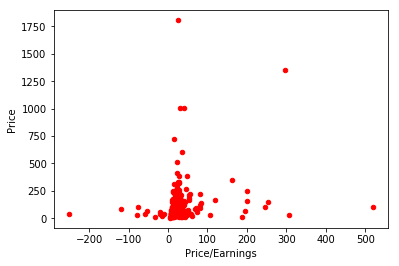

In [244]:
constituents_financials_df.plot.scatter(x='Price/Earnings',y='Price',c='RED')

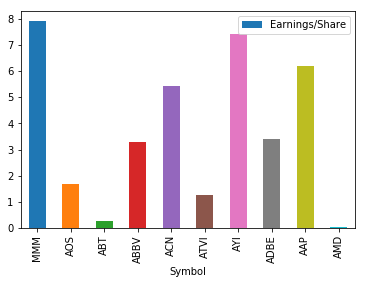

In [246]:
constituents_financials_df[:10].plot.bar(x='Symbol',y='Earnings/Share')